In [4]:
import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

import seaborn as sns
import datetime

## Catcher DataFrames

In [5]:
#DF1=  clutch_cat_30.csv
#DF2 = clutch_cat_100.csv
#DF3 = allstr_clutch_cat.csv

In [6]:
import psycopg2 as p2
conn = p2.connect(database = 'player_stats', user ='baseball_master', password = 'georgetowndata', 
                  host = 'georgetown-baseball.cnfqonxqdbry.us-east-1.rds.amazonaws.com', 
                  port = '5432')

##pd.read_csv('Reg_Catcher_Stats_100.csv')

### Non- All Star Catchers who have played at least 30 games at their position

In [7]:
query="""
select "playerID", "POS", "yearID", "G"
from fielding 
where "yearID" >= '1947'
and "POS" = 'C'
and "G" > 30 and "G" < 100
and "playerID" not in 
   (Select "playerID"  ---count("playerID")
        from allstar_full
        group by "playerID"
        having count("playerID") > 5)
"""

Reg_Catcher_30 = pd.read_sql_query(query, conn)

In [8]:
Reg_Catcher_30.head()

,playerID,POS,yearID,G
0,camelha01,C,1947.0,51.0
1,dickege02,C,1947.0,80.0
2,earlyja01,C,1947.0,85.0
3,evansal01,C,1947.0,94.0
4,garagjo01,C,1947.0,74.0


### Clutch - Impact on winning percentage 

In [9]:
query ="""

select "year" as "yearID", "batter_id" as "playerID", "event_count", "average_win_change", "center_weighted_win_change"
as "clutch_win_change"
from clutch_bat
order by "yearID"

"""

Clutch = pd.read_sql_query(query, conn)

In [10]:
Clutch.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change
0,1950.0,aberal01,3.0,0.006172,-0.003889
1,1950.0,abramca01,55.0,0.010747,-0.006012
2,1950.0,addisbo01,24.0,0.014065,-0.013327
3,1950.0,bankhda01,41.0,0.005563,-0.005630
4,1950.0,bantaja01,14.0,0.010745,-0.015449


### Merge Impact on Winning Percentage Stat with Player

In [11]:
Clutch_Catcher_30 =pd.merge(Clutch, Reg_Catcher_30, on = ["playerID", "yearID"])

In [12]:
Clutch_Catcher_30.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G
0,1950.0,niarhgu01,78.0,0.019254,-0.014361,C,36.0
1,1950.0,grassmi01,224.0,0.012137,-0.003128,C,69.0
2,1950.0,owenmi01,261.0,0.009841,-0.006451,C,86.0
3,1950.0,guerrmi01,225.0,0.015700,-0.002629,C,78.0
4,1950.0,pramejo01,258.0,0.016503,-0.009897,C,73.0


### Offensive Stats

In [29]:
query="""
select a."playerID", m."nameFirst", m."nameLast", m."birthYear",a."yearID", a."G", a."AB",a."H",a."2B", a."3B",
a."SO", a."HBP", a."BB", a."SF", a."R", a."HR", a."RBI"
from batting a
join master m
on a."playerID" = m."playerID"
where a."yearID" >= '1947'
"""

Batting_Stats = pd.read_sql_query(query,conn)

In [32]:
Batting_Stats.head()

,playerID,nameFirst,nameLast,birthYear,yearID,G,AB,H,2B,3B,SO,HBP,BB,SF,R,HR,RBI,AVG
0,abernwo01,Woody,Abernathy,1915.0,1947.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,aberscl01,Cliff,Aberson,1921.0,1947.0,47.0,140.0,39.0,6.0,3.0,32.0,0.0,20.0,NaN,24.0,4.0,20.0,0.278571
2,adamsbo03,Bobby,Adams,1921.0,1947.0,81.0,217.0,59.0,11.0,2.0,23.0,4.0,25.0,NaN,39.0,4.0,20.0,0.271889
3,adamsbu01,Buster,Adams,1915.0,1947.0,69.0,182.0,45.0,11.0,1.0,29.0,0.0,26.0,NaN,21.0,2.0,15.0,0.247253
4,adamsdi01,Dick,Adams,1920.0,1947.0,37.0,89.0,18.0,2.0,3.0,18.0,0.0,2.0,NaN,9.0,2.0,11.0,0.202247


In [33]:
Batting_Stats['AVG'] = Batting_Stats['H'] / Batting_Stats['AB']

In [34]:
Batting_Stats["1B"] = Batting_Stats["H"] - Batting_Stats["2B"]- Batting_Stats["3B"]

In [35]:
Batting_Stats.HBP.fillna(0, inplace = True)

In [36]:
Batting_Stats.SF.fillna(0, inplace = True)

In [37]:
Batting_Stats["TB"] = Batting_Stats["1B"] + Batting_Stats["2B"]*2 
+ Batting_Stats["3B"]*3 + Batting_Stats["HR"] * 4

0         0.0
1        25.0
2        22.0
3        11.0
4        17.0
5         8.0
6         0.0
7        32.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        9.0
14        4.0
15        0.0
16        0.0
17        0.0
18       22.0
19        4.0
20       47.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
70052     0.0
70053    18.0
70054    41.0
70055     0.0
70056     0.0
70057     0.0
70058     0.0
70059     0.0
70060    28.0
70061     0.0
70062     0.0
70063     0.0
70064     0.0
70065     0.0
70066    93.0
70067     0.0
70068     0.0
70069     0.0
70070     0.0
70071    36.0
70072     0.0
70073     0.0
70074     0.0
70075     0.0
70076     0.0
70077     0.0
70078    63.0
70079    81.0
70080    48.0
70081     0.0
Length: 70082, dtype: float64

In [38]:
Batting_Stats["SLG"] = Batting_Stats["TB"] / Batting_Stats["AB"]

In [39]:
Batting_Stats["OBP"] = (Batting_Stats["H"] + Batting_Stats["BB"] 
+ Batting_Stats["HBP"]) / (Batting_Stats ["AB"] + Batting_Stats ["BB"]
+ Batting_Stats["HBP"] + Batting_Stats["SF"])

In [40]:
Batting_Stats["OPS"] = Batting_Stats["OBP"] + Batting_Stats["SLG"]

### Runs Scored = Measures how many runs a player help created offensive (directly or indirectly) for his team during the season 

In [41]:
Batting_Stats["RC"] = Batting_Stats["TB"] * Batting_Stats["OBP"]

In [42]:
Batting_Stats.head()

,playerID,nameFirst,nameLast,birthYear,yearID,G,AB,H,2B,3B,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,abernwo01,Woody,Abernathy,1915.0,1947.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,aberscl01,Cliff,Aberson,1921.0,1947.0,47.0,140.0,39.0,6.0,3.0,...,24.0,4.0,20.0,0.278571,30.0,42.0,0.300000,0.368750,0.668750,15.487500
2,adamsbo03,Bobby,Adams,1921.0,1947.0,81.0,217.0,59.0,11.0,2.0,...,39.0,4.0,20.0,0.271889,46.0,68.0,0.313364,0.357724,0.671088,24.325203
3,adamsbu01,Buster,Adams,1915.0,1947.0,69.0,182.0,45.0,11.0,1.0,...,21.0,2.0,15.0,0.247253,33.0,55.0,0.302198,0.341346,0.643544,18.774038
4,adamsdi01,Dick,Adams,1920.0,1947.0,37.0,89.0,18.0,2.0,3.0,...,9.0,2.0,11.0,0.202247,13.0,17.0,0.191011,0.219780,0.410791,3.736264


### Merge with other offensive stats

In [43]:
pd.merge(Clutch_Catcher_30, Batting_Stats, on = ["playerID", "yearID"])

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,niarhgu01,78.0,0.019254,-0.014361,C,36.0,Gus,Niarhos,1920.0,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1950.0,niarhgu01,78.0,0.019254,-0.014361,C,36.0,Gus,Niarhos,1920.0,...,17.0,0.0,16.0,0.323810,30.0,38.0,0.361905,0.408333,0.770238,15.516667
2,1950.0,grassmi01,224.0,0.012137,-0.003128,C,69.0,Mickey,Grasso,1920.0,...,25.0,1.0,22.0,0.287179,51.0,59.0,0.302564,0.373874,0.676438,22.058559
3,1950.0,owenmi01,261.0,0.009841,-0.006451,C,86.0,Mickey,Owen,1916.0,...,22.0,2.0,21.0,0.243243,52.0,74.0,0.285714,0.282051,0.567766,20.871795
4,1950.0,guerrmi01,225.0,0.015700,-0.002629,C,78.0,Mike,Guerra,1912.0,...,25.0,2.0,26.0,0.281746,57.0,77.0,0.305556,0.324627,0.630182,24.996269
5,1950.0,pramejo01,258.0,0.016503,-0.009897,C,73.0,Johnny,Pramesa,1925.0,...,14.0,5.0,30.0,0.307018,59.0,79.0,0.346491,0.362903,0.709394,28.669355
6,1950.0,battsma01,219.0,0.010713,-0.013008,C,73.0,Matt,Batts,1921.0,...,27.0,4.0,34.0,0.273109,47.0,77.0,0.323529,0.326848,0.650378,25.167315
7,1950.0,howeldi02,265.0,0.011432,-0.012730,C,81.0,Dixie,Howell,1920.0,...,30.0,2.0,22.0,0.223214,40.0,58.0,0.258929,0.325581,0.584510,18.883721
8,1950.0,astrojo01,115.0,0.012429,-0.009214,C,38.0,Joe,Astroth,1922.0,...,11.0,1.0,18.0,0.327273,32.0,38.0,0.345455,0.421875,0.767330,16.031250
9,1950.0,edwarbr01,161.0,0.004037,-0.013142,C,38.0,Bruce,Edwards,1923.0,...,16.0,8.0,16.0,0.183099,21.0,29.0,0.204225,0.256410,0.460636,7.435897


In [44]:
clutch_cat_30 = pd.merge(Clutch_Catcher_30, Batting_Stats, on = ["playerID", "yearID"])

In [45]:
clutch_cat_30.head(3)

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,niarhgu01,78.0,0.019254,-0.014361,C,36.0,Gus,Niarhos,1920.0,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1950.0,niarhgu01,78.0,0.019254,-0.014361,C,36.0,Gus,Niarhos,1920.0,...,17.0,0.0,16.0,0.323810,30.0,38.0,0.361905,0.408333,0.770238,15.516667
2,1950.0,grassmi01,224.0,0.012137,-0.003128,C,69.0,Mickey,Grasso,1920.0,...,25.0,1.0,22.0,0.287179,51.0,59.0,0.302564,0.373874,0.676438,22.058559


In [46]:
clutch_cat_30.dropna(how = 'any', inplace = True)

In [47]:
clutch_cat_30.fillna(0).head(5)

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
1,1950.0,niarhgu01,78.0,0.019254,-0.014361,C,36.0,Gus,Niarhos,1920.0,...,17.0,0.0,16.0,0.323810,30.0,38.0,0.361905,0.408333,0.770238,15.516667
2,1950.0,grassmi01,224.0,0.012137,-0.003128,C,69.0,Mickey,Grasso,1920.0,...,25.0,1.0,22.0,0.287179,51.0,59.0,0.302564,0.373874,0.676438,22.058559
3,1950.0,owenmi01,261.0,0.009841,-0.006451,C,86.0,Mickey,Owen,1916.0,...,22.0,2.0,21.0,0.243243,52.0,74.0,0.285714,0.282051,0.567766,20.871795
4,1950.0,guerrmi01,225.0,0.015700,-0.002629,C,78.0,Mike,Guerra,1912.0,...,25.0,2.0,26.0,0.281746,57.0,77.0,0.305556,0.324627,0.630182,24.996269
5,1950.0,pramejo01,258.0,0.016503,-0.009897,C,73.0,Johnny,Pramesa,1925.0,...,14.0,5.0,30.0,0.307018,59.0,79.0,0.346491,0.362903,0.709394,28.669355


In [48]:
clutch_cat_30.drop('G_y', axis = 1, inplace = True)

In [49]:
clutch_cat_30.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
1,1950.0,niarhgu01,78.0,0.019254,-0.014361,C,36.0,Gus,Niarhos,1920.0,...,17.0,0.0,16.0,0.323810,30.0,38.0,0.361905,0.408333,0.770238,15.516667
2,1950.0,grassmi01,224.0,0.012137,-0.003128,C,69.0,Mickey,Grasso,1920.0,...,25.0,1.0,22.0,0.287179,51.0,59.0,0.302564,0.373874,0.676438,22.058559
3,1950.0,owenmi01,261.0,0.009841,-0.006451,C,86.0,Mickey,Owen,1916.0,...,22.0,2.0,21.0,0.243243,52.0,74.0,0.285714,0.282051,0.567766,20.871795
4,1950.0,guerrmi01,225.0,0.015700,-0.002629,C,78.0,Mike,Guerra,1912.0,...,25.0,2.0,26.0,0.281746,57.0,77.0,0.305556,0.324627,0.630182,24.996269
5,1950.0,pramejo01,258.0,0.016503,-0.009897,C,73.0,Johnny,Pramesa,1925.0,...,14.0,5.0,30.0,0.307018,59.0,79.0,0.346491,0.362903,0.709394,28.669355


In [50]:
clutch_cat_30.to_csv('clutch_cat_30.csv')

In [51]:
clutch_cat_30 = pd.read_csv('clutch_cat_30.csv', index_col= 0 )

In [52]:
clutch_cat_30.head() 

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
1,1950.0,niarhgu01,78.0,0.019254,-0.014361,C,36.0,Gus,Niarhos,1920.0,...,17.0,0.0,16.0,0.323810,30.0,38.0,0.361905,0.408333,0.770238,15.516667
2,1950.0,grassmi01,224.0,0.012137,-0.003128,C,69.0,Mickey,Grasso,1920.0,...,25.0,1.0,22.0,0.287179,51.0,59.0,0.302564,0.373874,0.676438,22.058559
3,1950.0,owenmi01,261.0,0.009841,-0.006451,C,86.0,Mickey,Owen,1916.0,...,22.0,2.0,21.0,0.243243,52.0,74.0,0.285714,0.282051,0.567766,20.871795
4,1950.0,guerrmi01,225.0,0.015700,-0.002629,C,78.0,Mike,Guerra,1912.0,...,25.0,2.0,26.0,0.281746,57.0,77.0,0.305556,0.324627,0.630182,24.996269
5,1950.0,pramejo01,258.0,0.016503,-0.009897,C,73.0,Johnny,Pramesa,1925.0,...,14.0,5.0,30.0,0.307018,59.0,79.0,0.346491,0.362903,0.709394,28.669355


### Visualize data relationships using scatterplots

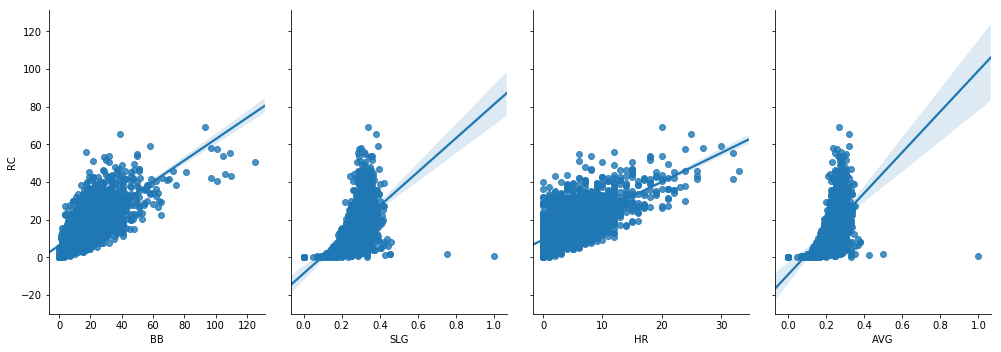

In [53]:
##seaborn as sns
sns.pairplot(clutch_cat_30, x_vars = ['BB','SLG','HR','AVG'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')

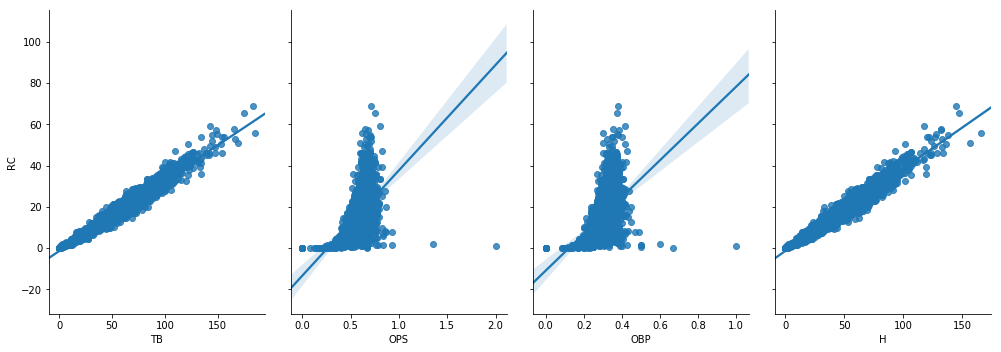

In [54]:
sns.pairplot(clutch_cat_30, x_vars = ['TB','OPS','OBP','H'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')

### Non- All Star Catchers who have played at least 100 games at their position

In [55]:
query="""
select "playerID", "POS", "yearID", "G"
from fielding 
where "yearID" >= '1947'
and "POS" = 'C'
and "G" >= 100
and "playerID" not in 
   (Select "playerID"  ---count("playerID")
        from allstar_full
        group by "playerID"
        having count("playerID") > 5)
"""

Reg_Catcher_100 = pd.read_sql_query(query, conn)

### Merge Impact on Winning Percentage Stat with Player

In [56]:
Clutch_Catcher_100 =pd.merge(Clutch, Reg_Catcher_100, on = ["playerID", "yearID"])

In [76]:
Clutch_Catcher_100.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G
0,1950.0,heganji01,480.0,0.011815,-0.011963,C,129.0
1,1950.0,ricede01,392.0,0.012450,-0.014654,C,130.0
2,1950.0,robinaa01,303.0,0.011968,-0.013285,C,103.0
3,1950.0,masiph01,365.0,0.016138,-0.013917,C,114.0
4,1950.0,mcculcl01,274.0,0.013612,-0.011537,C,100.0


### Merge with other offensive stats

In [58]:
pd.merge(Clutch_Catcher_100, Batting_Stats, on = ["playerID", "yearID"])

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,heganji01,480.0,0.011815,-0.011963,C,129.0,Jim,Hegan,1920.0,...,53.0,14.0,58.0,0.219277,70.0,102.0,0.245783,0.291028,0.536812,29.684902
1,1950.0,ricede01,392.0,0.012450,-0.014654,C,130.0,Del,Rice,1922.0,...,39.0,9.0,54.0,0.243961,78.0,118.0,0.285024,0.322511,0.607535,38.056277
2,1950.0,robinaa01,303.0,0.011968,-0.013285,C,103.0,Aaron,Robinson,1915.0,...,37.0,9.0,37.0,0.226148,57.0,71.0,0.250883,0.388268,0.639152,27.567039
3,1950.0,masiph01,365.0,0.016138,-0.013917,C,114.0,Phil,Masi,1916.0,...,38.0,7.0,55.0,0.278515,86.0,120.0,0.318302,0.365967,0.684270,43.916084
4,1950.0,mcculcl01,274.0,0.013612,-0.011537,C,100.0,Clyde,McCullough,1917.0,...,28.0,6.0,34.0,0.254480,51.0,83.0,0.297491,0.339683,0.637174,28.193651
5,1950.0,westrwe01,504.0,0.015505,-0.014724,C,139.0,Wes,Westrum,1922.0,...,68.0,23.0,71.0,0.235698,87.0,113.0,0.258581,0.370998,0.629579,41.922787
6,1950.0,seminan01,470.0,0.012781,-0.020584,C,124.0,Andy,Seminick,1920.0,...,55.0,24.0,68.0,0.287532,95.0,125.0,0.318066,0.400428,0.718494,50.053533
7,1951.0,westrwe01,456.0,0.014668,-0.015686,C,122.0,Wes,Westrum,1922.0,...,59.0,20.0,70.0,0.218837,67.0,91.0,0.252078,0.400000,0.652078,36.400000
8,1951.0,ricede01,337.0,0.012742,-0.011456,C,120.0,Del,Rice,1922.0,...,34.0,9.0,47.0,0.251337,80.0,106.0,0.283422,0.318735,0.602157,33.785888
9,1951.0,heganji01,473.0,0.007014,-0.012499,C,129.0,Jim,Hegan,1920.0,...,60.0,6.0,43.0,0.237981,77.0,111.0,0.266827,0.301762,0.568589,33.495595


In [59]:
clutch_cat_100 = pd.merge(Clutch_Catcher_100, Batting_Stats, on = ["playerID", "yearID"])

In [60]:
clutch_cat_100.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,heganji01,480.0,0.011815,-0.011963,C,129.0,Jim,Hegan,1920.0,...,53.0,14.0,58.0,0.219277,70.0,102.0,0.245783,0.291028,0.536812,29.684902
1,1950.0,ricede01,392.0,0.012450,-0.014654,C,130.0,Del,Rice,1922.0,...,39.0,9.0,54.0,0.243961,78.0,118.0,0.285024,0.322511,0.607535,38.056277
2,1950.0,robinaa01,303.0,0.011968,-0.013285,C,103.0,Aaron,Robinson,1915.0,...,37.0,9.0,37.0,0.226148,57.0,71.0,0.250883,0.388268,0.639152,27.567039
3,1950.0,masiph01,365.0,0.016138,-0.013917,C,114.0,Phil,Masi,1916.0,...,38.0,7.0,55.0,0.278515,86.0,120.0,0.318302,0.365967,0.684270,43.916084
4,1950.0,mcculcl01,274.0,0.013612,-0.011537,C,100.0,Clyde,McCullough,1917.0,...,28.0,6.0,34.0,0.254480,51.0,83.0,0.297491,0.339683,0.637174,28.193651


In [61]:
clutch_cat_100 = pd.merge(Clutch_Catcher_100, Batting_Stats, on = ["playerID", "yearID"])

In [62]:
clutch_cat_100.dropna(how = 'any', inplace = True)

In [63]:
clutch_cat_100.fillna(0).head(5)

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,heganji01,480.0,0.011815,-0.011963,C,129.0,Jim,Hegan,1920.0,...,53.0,14.0,58.0,0.219277,70.0,102.0,0.245783,0.291028,0.536812,29.684902
1,1950.0,ricede01,392.0,0.012450,-0.014654,C,130.0,Del,Rice,1922.0,...,39.0,9.0,54.0,0.243961,78.0,118.0,0.285024,0.322511,0.607535,38.056277
2,1950.0,robinaa01,303.0,0.011968,-0.013285,C,103.0,Aaron,Robinson,1915.0,...,37.0,9.0,37.0,0.226148,57.0,71.0,0.250883,0.388268,0.639152,27.567039
3,1950.0,masiph01,365.0,0.016138,-0.013917,C,114.0,Phil,Masi,1916.0,...,38.0,7.0,55.0,0.278515,86.0,120.0,0.318302,0.365967,0.684270,43.916084
4,1950.0,mcculcl01,274.0,0.013612,-0.011537,C,100.0,Clyde,McCullough,1917.0,...,28.0,6.0,34.0,0.254480,51.0,83.0,0.297491,0.339683,0.637174,28.193651


In [64]:
clutch_cat_100.drop('G_y', axis = 1, inplace = True)

In [65]:
clutch_cat_100.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,heganji01,480.0,0.011815,-0.011963,C,129.0,Jim,Hegan,1920.0,...,53.0,14.0,58.0,0.219277,70.0,102.0,0.245783,0.291028,0.536812,29.684902
1,1950.0,ricede01,392.0,0.012450,-0.014654,C,130.0,Del,Rice,1922.0,...,39.0,9.0,54.0,0.243961,78.0,118.0,0.285024,0.322511,0.607535,38.056277
2,1950.0,robinaa01,303.0,0.011968,-0.013285,C,103.0,Aaron,Robinson,1915.0,...,37.0,9.0,37.0,0.226148,57.0,71.0,0.250883,0.388268,0.639152,27.567039
3,1950.0,masiph01,365.0,0.016138,-0.013917,C,114.0,Phil,Masi,1916.0,...,38.0,7.0,55.0,0.278515,86.0,120.0,0.318302,0.365967,0.684270,43.916084
4,1950.0,mcculcl01,274.0,0.013612,-0.011537,C,100.0,Clyde,McCullough,1917.0,...,28.0,6.0,34.0,0.254480,51.0,83.0,0.297491,0.339683,0.637174,28.193651


In [66]:
clutch_cat_100.to_csv('clutch_cat_100.csv')

In [67]:
clutch_cat_100 = pd.read_csv('clutch_cat_100.csv', index_col= 0 )

In [93]:
clutch_cat_100.head() 

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,heganji01,480.0,0.011815,-0.011963,C,129.0,Jim,Hegan,1920.0,...,53.0,14.0,58.0,0.219277,70.0,102.0,0.245783,0.291028,0.536812,29.684902
1,1950.0,ricede01,392.0,0.012450,-0.014654,C,130.0,Del,Rice,1922.0,...,39.0,9.0,54.0,0.243961,78.0,118.0,0.285024,0.322511,0.607535,38.056277
2,1950.0,robinaa01,303.0,0.011968,-0.013285,C,103.0,Aaron,Robinson,1915.0,...,37.0,9.0,37.0,0.226148,57.0,71.0,0.250883,0.388268,0.639152,27.567039
3,1950.0,masiph01,365.0,0.016138,-0.013917,C,114.0,Phil,Masi,1916.0,...,38.0,7.0,55.0,0.278515,86.0,120.0,0.318302,0.365967,0.684270,43.916084
4,1950.0,mcculcl01,274.0,0.013612,-0.011537,C,100.0,Clyde,McCullough,1917.0,...,28.0,6.0,34.0,0.254480,51.0,83.0,0.297491,0.339683,0.637174,28.193651


### Visualize data relationships using scatterplots

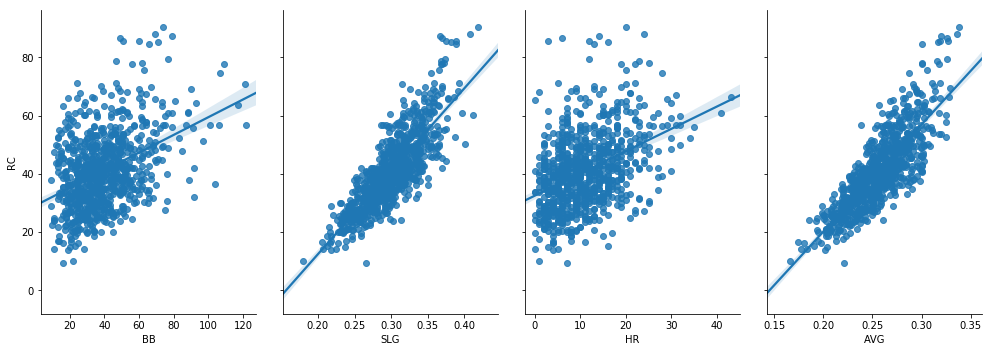

In [69]:
##seaborn as sns
sns.pairplot(clutch_cat_100, x_vars = ['BB','SLG','HR','AVG'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')

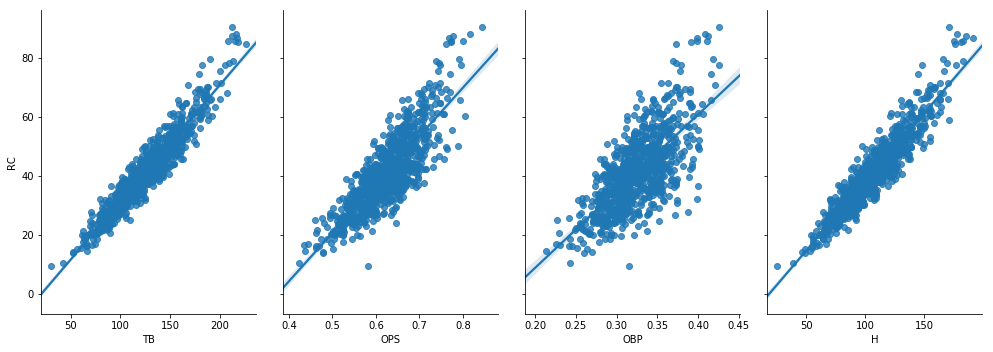

In [70]:
sns.pairplot(clutch_cat_100, x_vars = ['TB','OPS','OBP','H'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')

### All Star Catchers who have played at least 100 games at their position

In [72]:
query="""
select "playerID", "POS", "yearID","G"
from fielding 
where "yearID" >= '1947'
and "POS" = 'C'
and "G" > 100
and "playerID" in  
        (Select "playerID"  ---count("playerID")
        from allstar_full
        group by "playerID"
        having count("playerID") > 5)
"""

All_Star_Catcher_100 = pd.read_sql_query(query, conn)

### Merge Impact on Winning Percentage Stat with Player

In [82]:
Clutch_Allstr_Catcher =pd.merge(Clutch, All_Star_Catcher_100, on = ["playerID", "yearID"])

In [83]:
Clutch_Allstr_Catcher.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G
0,1950.0,berrayo01,622.0,0.015356,-0.016478,C,148.0
1,1950.0,lollash01,316.0,0.017708,-0.004316,C,109.0
2,1950.0,camparo01,504.0,0.014228,-0.016401,C,123.0
3,1951.0,berrayo01,583.0,0.013528,-0.018051,C,141.0
4,1951.0,camparo01,584.0,0.016612,-0.018750,C,140.0


### Merge with other offensive stats

In [86]:
allstr_clutch_cat = pd.merge(Clutch_Allstr_Catcher, Batting_Stats, on = ["playerID", "yearID"])

In [85]:
allstr_clutch_cat.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,berrayo01,622.0,0.015356,-0.016478,C,148.0,Yogi,Berra,1925.0,...,116.0,28.0,124.0,0.321608,156.0,216.0,0.361809,0.382622,0.744431,82.646341
1,1950.0,lollash01,316.0,0.017708,-0.004316,C,109.0,Sherm,Lollar,1924.0,...,55.0,13.0,65.0,0.280303,86.0,130.0,0.328283,0.391026,0.719308,50.833333
2,1950.0,camparo01,504.0,0.014228,-0.016401,C,123.0,Roy,Campanella,1921.0,...,70.0,31.0,89.0,0.281465,101.0,139.0,0.318078,0.364372,0.682450,50.647773
3,1951.0,berrayo01,583.0,0.013528,-0.018051,C,141.0,Yogi,Berra,1925.0,...,92.0,27.0,88.0,0.294333,138.0,176.0,0.321755,0.350168,0.671923,61.629630
4,1951.0,camparo01,584.0,0.016612,-0.018750,C,140.0,Roy,Campanella,1921.0,...,90.0,33.0,108.0,0.324752,130.0,196.0,0.388119,0.393238,0.781357,77.074733


In [87]:
allstr_clutch_cat.dropna(how = 'any', inplace = True)

In [88]:
allstr_clutch_cat.fillna(0).head(5)

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,berrayo01,622.0,0.015356,-0.016478,C,148.0,Yogi,Berra,1925.0,...,116.0,28.0,124.0,0.321608,156.0,216.0,0.361809,0.382622,0.744431,82.646341
1,1950.0,lollash01,316.0,0.017708,-0.004316,C,109.0,Sherm,Lollar,1924.0,...,55.0,13.0,65.0,0.280303,86.0,130.0,0.328283,0.391026,0.719308,50.833333
2,1950.0,camparo01,504.0,0.014228,-0.016401,C,123.0,Roy,Campanella,1921.0,...,70.0,31.0,89.0,0.281465,101.0,139.0,0.318078,0.364372,0.682450,50.647773
3,1951.0,berrayo01,583.0,0.013528,-0.018051,C,141.0,Yogi,Berra,1925.0,...,92.0,27.0,88.0,0.294333,138.0,176.0,0.321755,0.350168,0.671923,61.629630
4,1951.0,camparo01,584.0,0.016612,-0.018750,C,140.0,Roy,Campanella,1921.0,...,90.0,33.0,108.0,0.324752,130.0,196.0,0.388119,0.393238,0.781357,77.074733


In [89]:
allstr_clutch_cat.drop('G_y', axis = 1, inplace = True)

In [90]:
allstr_clutch_cat.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,berrayo01,622.0,0.015356,-0.016478,C,148.0,Yogi,Berra,1925.0,...,116.0,28.0,124.0,0.321608,156.0,216.0,0.361809,0.382622,0.744431,82.646341
1,1950.0,lollash01,316.0,0.017708,-0.004316,C,109.0,Sherm,Lollar,1924.0,...,55.0,13.0,65.0,0.280303,86.0,130.0,0.328283,0.391026,0.719308,50.833333
2,1950.0,camparo01,504.0,0.014228,-0.016401,C,123.0,Roy,Campanella,1921.0,...,70.0,31.0,89.0,0.281465,101.0,139.0,0.318078,0.364372,0.682450,50.647773
3,1951.0,berrayo01,583.0,0.013528,-0.018051,C,141.0,Yogi,Berra,1925.0,...,92.0,27.0,88.0,0.294333,138.0,176.0,0.321755,0.350168,0.671923,61.629630
4,1951.0,camparo01,584.0,0.016612,-0.018750,C,140.0,Roy,Campanella,1921.0,...,90.0,33.0,108.0,0.324752,130.0,196.0,0.388119,0.393238,0.781357,77.074733


In [91]:
allstr_clutch_cat.to_csv('allstr_clutch_cat.csv')

In [94]:
allstr_clutch_cat = pd.read_csv('allstr_clutch_cat.csv', index_col= 0 )

In [95]:
allstr_clutch_cat.head() 

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,berrayo01,622.0,0.015356,-0.016478,C,148.0,Yogi,Berra,1925.0,...,116.0,28.0,124.0,0.321608,156.0,216.0,0.361809,0.382622,0.744431,82.646341
1,1950.0,lollash01,316.0,0.017708,-0.004316,C,109.0,Sherm,Lollar,1924.0,...,55.0,13.0,65.0,0.280303,86.0,130.0,0.328283,0.391026,0.719308,50.833333
2,1950.0,camparo01,504.0,0.014228,-0.016401,C,123.0,Roy,Campanella,1921.0,...,70.0,31.0,89.0,0.281465,101.0,139.0,0.318078,0.364372,0.682450,50.647773
3,1951.0,berrayo01,583.0,0.013528,-0.018051,C,141.0,Yogi,Berra,1925.0,...,92.0,27.0,88.0,0.294333,138.0,176.0,0.321755,0.350168,0.671923,61.629630
4,1951.0,camparo01,584.0,0.016612,-0.018750,C,140.0,Roy,Campanella,1921.0,...,90.0,33.0,108.0,0.324752,130.0,196.0,0.388119,0.393238,0.781357,77.074733


### Visualize data relationships using scatterplots

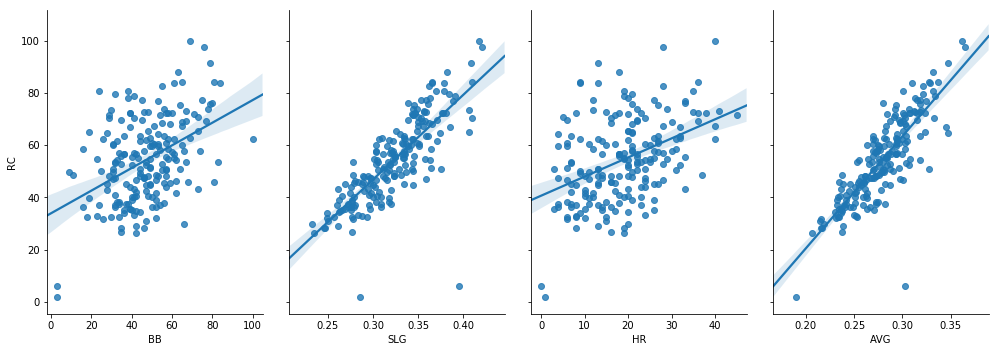

In [96]:
##seaborn as sns
sns.pairplot(allstr_clutch_cat, x_vars = ['BB','SLG','HR','AVG'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')

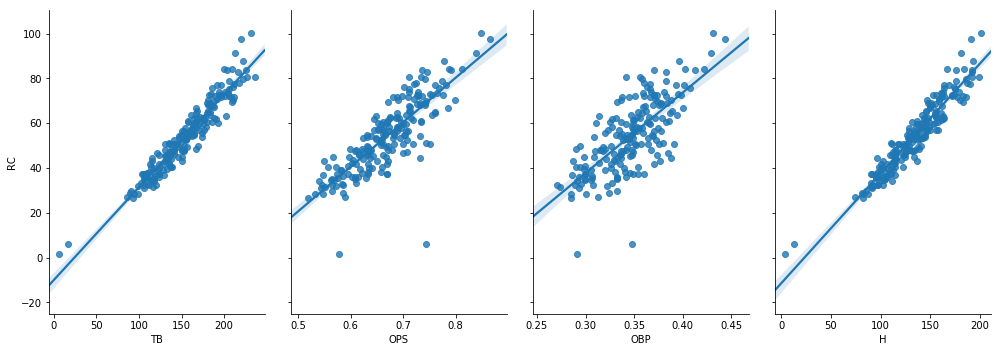

In [97]:
sns.pairplot(allstr_clutch_cat, x_vars = ['TB','OPS','OBP','H'], y_vars = 'RC', height = 5, aspect = 0.7, kind = 'reg')